In [1]:
import torch
import torch.nn as nn
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Datasets/Car_Price_Prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
processed_df = pd.DataFrame()
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        if processed_df.empty:
            processed_df = processed_df.append(df[[col]])
        else:
            processed_df = processed_df.join(df[col], lsuffix=col)
    else:
        enc = OneHotEncoder()
        state_encoding = enc.fit_transform(df[[col]]).toarray()
        state_df = pd.DataFrame(state_encoding)
        if processed_df.empty:
            processed_df = processed_df.append(state_df)
        else:
            processed_df = processed_df.join(state_df, lsuffix=col)

In [6]:
processed_df = processed_df.drop(['car_ID'], axis=1)
processed_df.head()

,symboling,0fueltype,1fueltype,2carbody,3carbody,4carbody,5enginetype,6enginetype,7fuelsystem,8,...,6,7,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
y = processed_df['price'].values
processed_df = processed_df.drop(['price'], axis=1)
x = processed_df.to_numpy()

In [8]:
x = normalize(x)
y = normalize(y.reshape(-1,1), axis=0)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=33, shuffle=True)
x_test, x_validation, y_test, y_validation = train_test_split(x_test,y_test,test_size=0.2,random_state=33, shuffle=True)

In [10]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)
x_validation = torch.FloatTensor(x_validation)
y_validation = torch.FloatTensor(y_validation)

In [11]:
class Model(nn.Module):
    def __init__(self, in_features=199, h1=256, h2=128, h3=64, h4=32, h5=16, h6=8,  out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, h5)
        self.fc6 = nn.Linear(h5, h6)
        self.out = nn.Linear(h6, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.out(x)
        return x

In [12]:
model = Model()
criterion = nn.L1Loss() # good for multilayer regression similar to mse but robust to outliers.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
epochs =10000
losses = []
for i in range(epochs):
    i+=1
    optimizer.zero_grad()
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    if i%1000 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    loss.backward()
    optimizer.step()

epoch:  1  loss: 0.06760940
epoch: 1001  loss: 0.00665894
epoch: 2001  loss: 0.00604498
epoch: 3001  loss: 0.00706373
epoch: 4001  loss: 0.00447003
epoch: 5001  loss: 0.00290902
epoch: 6001  loss: 0.00356406
epoch: 7001  loss: 0.00197508
epoch: 8001  loss: 0.00189208
epoch: 9001  loss: 0.00478363


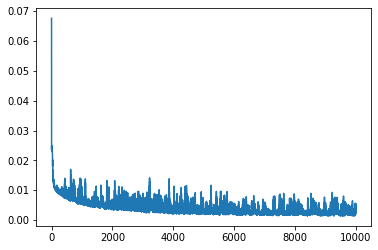

In [14]:
plt.plot(range(epochs), losses)

In [15]:
with torch.no_grad():
    y_val = model.forward(x_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.01169906


In [16]:
error_rate = 0.0500
correct = 0
with torch.no_grad():
    for i in range(len(x_test)):
        y_val = model.forward(x_test[i])
        if abs(y_val.item()-y_test[i].item()) < error_rate:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')


32 out of 32 = 100.00% correct


In [17]:
model.eval()

Model(
  (fc1): Linear(in_features=199, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
)

In [18]:
with torch.no_grad():
    for i in range(len(x_validation)):
        y_val = model(x_validation[i])
        print(str(y_val) + ' : ' + str(y_validation[i]))

tensor([0.0425]) : tensor([0.0419])
tensor([0.0355]) : tensor([0.0334])
tensor([0.0324]) : tensor([0.0322])
tensor([0.0614]) : tensor([0.0760])
tensor([0.0715]) : tensor([0.0600])
tensor([0.0859]) : tensor([0.0710])
tensor([0.0327]) : tensor([0.0331])
tensor([0.0326]) : tensor([0.0300])
tensor([0.0937]) : tensor([0.0625])
